<a href="https://colab.research.google.com/github/neel26desai/basic_neural_networks/blob/main/neural_network_with_pytorch_lightening.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pytorch-lightning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.6/801.6 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import tensorflow as tf
import pytorch_lightning as pl

In [3]:
seed= 37
torch.manual_seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

In [7]:
# defining the data
n, d = 1000, 3  # 1000 records 3 features

# creating x, values will be between -1 and 1 and the shape will be n,d
x = torch.rand(n, d) * 2 - 1  # Uniform distribution between -1 and 1

# creating weights that allow us to get the y_true values
weights_true = torch.tensor([[1], [3], [1]], dtype=torch.float32)
bias_true = torch.tensor([1], dtype=torch.float32)

# creating an equation for our y_true using torch.einsum for matrix multiplication
y_true = torch.einsum('ij,jk->ik', x ** 3, weights_true) + \
         torch.einsum('ij,jk->ik', x ** 2, weights_true) + \
         torch.einsum('ij,jk->ik', x, weights_true) + bias_true

print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

x: torch.Size([1000, 3]), weights: torch.Size([3, 1]), bias: torch.Size([1]), y: torch.Size([1000, 1])


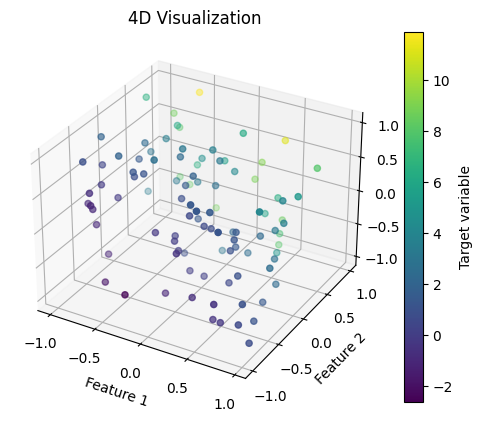

In [6]:
#defining function for visualizaing the data
def visualize_4d_data(x, y_true):
    """
    Visualizes 4D data using a 3D scatter plot with color representing the fourth dimension.

    Args:
    x (numpy.ndarray): Input features with shape (n, 3).
    y_true (numpy.ndarray): Target variable with shape (n, 1).
    """
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y_true.ravel(), cmap='viridis')
    plt.colorbar(scatter, label='Target variable')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    plt.title('4D Visualization')
    plt.show()

# Example usage
visualize_4d_data(x, y_true)

In [29]:
class LightningModel(pl.LightningModule):
  def __init__(self, input_dim, hidden_dim, output_dim):
    super().__init__()

    self.layer1 = nn.Linear(input_dim, hidden_dim)
    self.layer2 = nn.ReLU()
    self.layer3 = nn.Linear(hidden_dim, hidden_dim+1)
    self.layer4 = nn.ReLU()
    self.layer5 = nn.Linear(hidden_dim+1, output_dim)
    self.loss_fn = nn.MSELoss()
    self.train_losses = []
    self.val_losses = []

  def forward(self, x):
    x = self.layer1(x)
    x = self.layer2(x)
    x = self.layer3(x)
    x = self.layer4(x)
    x = self.layer5(x)
    return x

    # def mse_loss(self, y_pred,y_true):
    #   return nn.MSELoss(y_true, y_pred)


  def training_step(self, train_batch, batch_idx):
      x, y = train_batch
      y_pred = self.forward(x)
      loss = self.loss_fn(y_pred, y)
      self.log('train_loss', loss)
      return loss

  def validation_step(self, val_batch, batch_idx):
      x, y = val_batch
      y_pred = self.forward(x)
      loss = self.loss_fn(y_pred, y)
      self.log('val_loss', loss)

  def on_train_epoch_end(self):
    train_loss = trainer.callback_metrics['train_loss'].item()
    self.train_losses.append(train_loss)


  def on_validation_epoch_end(self):
    val_loss = trainer.callback_metrics['val_loss'].item()
    self.val_losses.append(val_loss)

  def configure_optimizers(self):
      optimizer = torch.optim.Adam(self.parameters(), lr=1e-3)
      return optimizer

In [9]:
from torch.utils.data import DataLoader, TensorDataset
from pytorch_lightning import Trainer

In [10]:
# Splitting the data into training and validation sets
train_size = int(n * 0.8)
val_size = n - train_size
x_train, x_val = torch.split(x, [train_size, val_size])
y_train, y_val = torch.split(y_true, [train_size, val_size])

# Creating PyTorch DataLoader for both training and validation sets
train_dataset = TensorDataset(x_train, y_train)
val_dataset = TensorDataset(x_val, y_val)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)


In [30]:
#Initializing the Lightning model
model = LightningModel(input_dim=d, hidden_dim=10, output_dim=1)

# Training the model
trainer = Trainer(max_epochs=100)
trainer.fit(model, train_loader, val_loader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name    | Type    | Params
------------------------------------
0 | layer1  | Linear  | 40    
1 | layer2  | ReLU    | 0     
2 | layer3  | Linear  | 121   
3 | layer4  | ReLU    | 0     
4 | layer5  | Linear  | 12    
5 | loss_fn | MSELoss | 0     
------------------------------------
173       Trainable params
0         Non-trainable params
173       Total params
0.001     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (13) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.


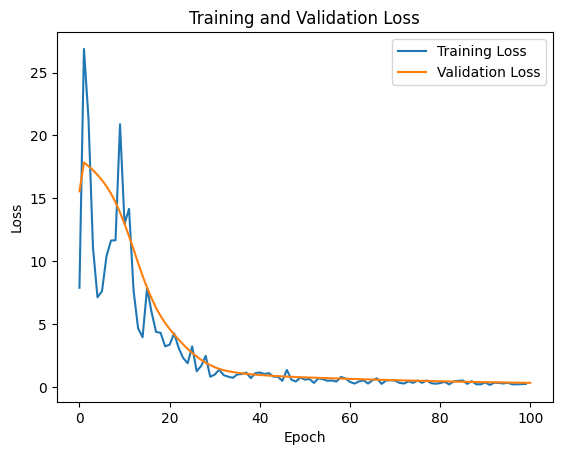

In [33]:
# Plotting the training and validation losses
plt.plot(model.train_losses, label='Training Loss')
plt.plot(model.val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [38]:
with torch.no_grad():
    y_pred = model(x_val)

In [42]:
nn.MSELoss()(y_val, y_pred).item()

0.3317636549472809

In [43]:
import numpy as np

def plot_function_and_predictions_4d(x, y_true, y_pred, output_dim=0, cmap='viridis'):
    """
    Plots the underlying function and the predicted function for a specific output dimension, with the fourth dimension represented by color.

    Args:
    x (numpy.ndarray): Input features with shape (n, 3).
    y_true (numpy.ndarray): True target values with shape (n, 2).
    y_pred (numpy.ndarray): Predicted target values with shape (n, 2).
    output_dim (int): The output dimension to visualize (0 or 1).
    cmap (str): Color map to use for the fourth dimension.
    """
    y_pred = y_pred.detach().numpy() # detach the param from current coputational graph (creating a new tensor) and convert it to numpy
    y_true = y_true.detach().numpy()
    x = x.detach().numpy()
    fig = plt.figure(figsize=(12, 6))

    # Define the color map for the fourth dimension
    norm = plt.Normalize(vmin=min(x[:, 2]), vmax=max(x[:, 2]))
    colors = plt.cm.get_cmap(cmap)(norm(x[:, 2]))

    # Plot the true values
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.scatter(x[:, 0], x[:, 1], y_true[:, output_dim], c=colors, marker='o', label='True')
    ax1.set_xlabel('X1')
    ax1.set_ylabel('X2')
    ax1.set_zlabel(f'Y{output_dim + 1}')
    ax1.set_title('Underlying Function')

    # Plot the predicted values
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.scatter(x[:, 0], x[:, 1], y_pred[:, output_dim], c=colors, marker='^', label='Predicted')
    ax2.set_xlabel('X1')
    ax2.set_ylabel('X2')
    ax2.set_zlabel(f'Y{output_dim + 1}')
    ax2.set_title('Predicted Function')

    # Add a color bar to indicate the fourth dimension
    mappable = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
    mappable.set_array(x[:, 2])
    plt.colorbar(mappable, ax=[ax1, ax2], label='X3 (Fourth Dimension)')

    plt.legend()
    plt.show()


<ipython-input-43-c8fee8415f2e>:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap(cmap)(norm(x[:, 2]))


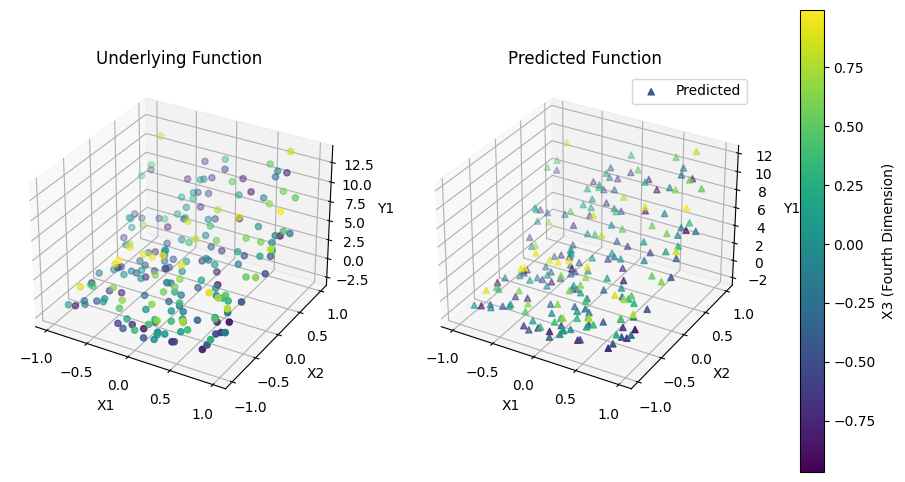

In [44]:
plot_function_and_predictions_4d(x_val, y_val, y_pred, output_dim=0)